# ADS 509 Team 1 Project - Tesla vs Toyota News Articles
### By: Jesse Gutierrez, Roger Qiu, Shailja Somani

link: https://newsapi.org/

newsapi key: d6995599193044b0a5f954c098da84d6

## Part 1. API retrival, pre-processing and EDA

### Install and add imports

In [ ]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


In [73]:
from newsapi import NewsApiClient
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import regex as re

import nltk
nltk.download('stopwords')

from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roger.qiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Check the newsAPI data source

In [3]:
# use API key to initialize newsapi client
newsapi = NewsApiClient(api_key='d6995599193044b0a5f954c098da84d6')
newsapi

In [ ]:
# check what the top headlines data looks like
top_headlines = newsapi.get_top_headlines(q='Tesla',
                                          category='business',
                                          language='en',
                                          country='us')

top_headlines                                    

{'status': 'ok',
 'totalResults': 6,
 'articles': [{'source': {'id': None, 'name': 'WMUR Manchester'},
   'author': 'Matt Leighton',
   'title': 'Tesla dealership, service center coming to Londonderry, NH - WMUR Manchester',
   'description': 'A Tesla dealership and service center is coming to southern New Hampshire.',
   'url': 'https://www.wmur.com/article/tesla-dealership-service-center-londonderry-nh/60764618',
   'urlToImage': 'https://kubrick.htvapps.com/htv-prod-media.s3.amazonaws.com/images/tesla-londonderry-vnr-0045-663f9cf58d028.jpg?crop=1.00xw:1.00xh;0,0&resize=1200:*',
   'publishedAt': '2024-05-11T23:44:00Z',
   'content': 'LONDONDERRY, N.H. —A Tesla dealership and service center is coming to southern New Hampshire.\r\nLondonderry town officials told News 9 that the dealership and service center is being built near the Ma… [+852 chars]'},
  {'source': {'id': None, 'name': 'InsideEVs '},
   'author': 'Wade Malone',
   'title': 'Tesla Offering 0.99% APR To Further Boost Mode

In [ ]:
# check all the available news sources
sources = newsapi.get_sources()
sources

{'status': 'ok',
 'sources': [{'id': 'abc-news',
   'name': 'ABC News',
   'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.',
   'url': 'https://abcnews.go.com',
   'category': 'general',
   'language': 'en',
   'country': 'us'},
  {'id': 'abc-news-au',
   'name': 'ABC News (AU)',
   'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
   'url': 'https://www.abc.net.au/news',
   'category': 'general',
   'language': 'en',
   'country': 'au'},
  {'id': 'aftenposten',
   'name': 'Aftenposten',
   'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.',
   'url': 'https://www.aftenposten.no',
   'category': 'general',
   'language': 'no',
   'country': 'no'},
  {'id': 'al-jazeera-english',
   'name': 'Al Jazeera English',
   'desc

### Retrieve and download Toyota and Tesla related articles

In [4]:
# get toyota news text data
toyota_raw = newsapi.get_everything(q='toyota',
                                      from_param='2024-04-20',
                                      to='2024-05-05',
                                      language='en',
                                      sort_by='relevancy',
                                      page=5)

toyota_raw

{'status': 'ok',
 'totalResults': 1233,
 'articles': [{'source': {'id': None, 'name': 'The Daily Dot'},
   'author': 'Rachel Kiley',
   'title': '‘Feel sad for Nissan’: Mechanic shares his picks for car brands that have become ‘money pits’',
   'description': "Buying a car is a long-term commitment—and an increasingly expensive one at that. In addition to the sticker price, yearly registration costs, insurance, and constantly fluctuating gas prices, you're also looking at maintenance costs that only hurt more and m…",
   'url': 'https://www.dailydot.com/news/nissan-money-pit/',
   'urlToImage': 'https://uploads.dailydot.com/2024/04/nissan-cars-money-pit.jpg?auto=compress&fm=pjpg',
   'publishedAt': '2024-05-02T04:00:00Z',
   'content': 'Buying a car is a long-term commitmentand an increasingly expensive one at that. In addition to the sticker price, yearly registration costs, insurance, and constantly fluctuating gas prices, you’re … [+2809 chars]'},
  {'source': {'id': None, 'name': '

In [ ]:
# convert the json into a df
df = pd.DataFrame(toyota_raw['articles'])
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'The Daily Dot'}",Melody Heald,‘But they want to sell us Nissan’: Nissan work...,Charlotte-based Nissan saleswoman Martina (@ma...,https://www.dailydot.com/news/nissan-workers-d...,https://uploads.dailydot.com/2024/04/nissan-ca...,2024-04-24T14:00:00Z,Charlotte-based Nissan saleswoman Martina (@ma...
1,"{'id': None, 'name': 'The Daily Dot'}",Rachel Kiley,‘Feel sad for Nissan’: Mechanic shares his pic...,Buying a car is a long-term commitment—and an ...,https://www.dailydot.com/news/nissan-money-pit/,https://uploads.dailydot.com/2024/04/nissan-ca...,2024-05-02T04:00:00Z,Buying a car is a long-term commitmentand an i...
2,"{'id': None, 'name': 'Independent.ie'}",Ralph Riegel,‘It's baffling’ – Gardaí appeal for help to so...,Gardaí are to launch a special appeal for info...,https://www.independent.ie/irish-news/its-baff...,https://focus.independent.ie/thumbor/UQaguxNIx...,2024-04-29T01:30:00Z,Gardaí are to launch a special appeal for info...
3,"{'id': None, 'name': 'Bangkok Post'}",Reuters,Car production down 23.1% y/y in March,Car production in Thailand dropped 23.08% in M...,https://www.bangkokpost.com/business/general/2...,https://static.bangkokpost.com/media/content/2...,2024-04-25T04:11:00Z,Car production in Thailand dropped 23.08% in M...
4,"{'id': None, 'name': 'Bangkok Post'}",Online Reporters,"500,000 speed pills found hidden under car","A drug courier was arrested after about 500,00...",https://www.bangkokpost.com/thailand/general/2...,https://static.bangkokpost.com/media/content/2...,2024-04-30T13:14:00Z,"A drug courier was arrested after about 500,00..."


In [ ]:
# create a data folder to store the csv data
if not os.path.exists('data/toyota'):
    os.makedirs('data/toyota')

In [ ]:
# download the toyota text data to data folder
df.to_csv('data/toyota/data.csv', index=False)

In [ ]:
# now do the same for tesla articles and text data
tesla_raw = newsapi.get_everything(q='tesla',
                                      from_param='2024-04-20',
                                      to='2024-05-05',
                                      language='en',
                                      sort_by='relevancy',
                                      page=5)

df = pd.DataFrame(tesla_raw['articles'])

if not os.path.exists('data/tesla'):
    os.makedirs('data/tesla')

df.to_csv('data/tesla/data.csv', index=False)

### read in and intial transformations

In [9]:
# read in the data
raw_tesla = pd.read_csv('data/tesla/data.csv')
raw_tesla.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,Tesla “Full Self Driving” Could Come To Other ...,Ever since Tesla started rolling out Full Self...,https://cleantechnica.com/2024/04/23/tesla-ful...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T03:55:41Z,Sign up for daily news updates from CleanTechn...
1,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,More Than 3× As Many Tesla Model Y Sales As Te...,"Tesla’s just had a tough quarter, including in...",https://cleantechnica.com/2024/04/19/more-than...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-20T03:57:24Z,Sign up for daily news updates from CleanTechn...
2,"{'id': None, 'name': 'CleanTechnica'}",Paul Fosse,Tesla Surprises Investors With A Tiny Y & A Ti...,A lot has been written about the Tesla’s next-...,https://cleantechnica.com/2024/04/23/tesla-sur...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T01:56:23Z,Sign up for daily news updates from CleanTechn...
3,"{'id': None, 'name': 'CleanTechnica'}",Carolyn Fortuna,The Revisionist Language That Tesla Used In Th...,"The Tesla, Inc. Q1 2024 earnings call was fasc...",https://cleantechnica.com/2024/04/26/the-revis...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-26T19:24:10Z,Sign up for daily news updates from CleanTechn...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Paul Sawers,French startup FlexAI exits stealth with $30M ...,A French startup has raised a hefty seed inves...,https://techcrunch.com/2024/04/23/french-start...,https://s.yimg.com/ny/api/res/1.2/V7FcJP2rJb.Y...,2024-04-24T05:37:28Z,A French startup has raised a hefty seed inves...


In [12]:
# 100 records with 8 fields
raw_tesla.shape

(100, 8)

In [19]:
# read the CSV file again
raw_toyota = pd.read_csv('data/toyota/data.csv')
raw_toyota.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'The Daily Dot'}",Melody Heald,‘But they want to sell us Nissan’: Nissan work...,Charlotte-based Nissan saleswoman Martina (@ma...,https://www.dailydot.com/news/nissan-workers-d...,https://uploads.dailydot.com/2024/04/nissan-ca...,2024-04-24T14:00:00Z,Charlotte-based Nissan saleswoman Martina (@ma...
1,"{'id': None, 'name': 'The Daily Dot'}",Rachel Kiley,‘Feel sad for Nissan’: Mechanic shares his pic...,Buying a car is a long-term commitment—and an ...,https://www.dailydot.com/news/nissan-money-pit/,https://uploads.dailydot.com/2024/04/nissan-ca...,2024-05-02T04:00:00Z,Buying a car is a long-term commitmentand an i...
2,"{'id': None, 'name': 'Independent.ie'}",Ralph Riegel,‘It's baffling’ – Gardaí appeal for help to so...,Gardaí are to launch a special appeal for info...,https://www.independent.ie/irish-news/its-baff...,https://focus.independent.ie/thumbor/UQaguxNIx...,2024-04-29T01:30:00Z,Gardaí are to launch a special appeal for info...
3,"{'id': None, 'name': 'Bangkok Post'}",Reuters,Car production down 23.1% y/y in March,Car production in Thailand dropped 23.08% in M...,https://www.bangkokpost.com/business/general/2...,https://static.bangkokpost.com/media/content/2...,2024-04-25T04:11:00Z,Car production in Thailand dropped 23.08% in M...
4,"{'id': None, 'name': 'Bangkok Post'}",Online Reporters,"500,000 speed pills found hidden under car","A drug courier was arrested after about 500,00...",https://www.bangkokpost.com/thailand/general/2...,https://static.bangkokpost.com/media/content/2...,2024-04-30T13:14:00Z,"A drug courier was arrested after about 500,00..."


In [20]:
# also 100 records and 8 fields
raw_toyota.shape

(100, 8)

In [24]:
# check how the title looks
raw_tesla['title'][0]

'Tesla “Full Self Driving” Could Come To Other Countries Before Long'

In [25]:
# check how content looks
raw_tesla['content'][0]

'Sign up for daily news updates from CleanTechnica on email. Or follow us on Google News!\r\nEver since Tesla started rolling out Full Self Driving (FSD) to non-employee Tesla owners in the US, people i… [+3965 chars]'

In [26]:
# check how the description looks
raw_tesla['description'][0]

# descriptions gives more information than content field.
# so title and description are the 2 fields we can use to combine into a new "text" field.

'Ever since Tesla started rolling out Full Self Driving (FSD) to non-employee Tesla owners in the US, people in other countries have been asking when they’ll be able to install and use FSD. As far as I remember, it’s always been a vague “someday…” kind of resp…'

In [28]:
# label both df's and then union into 1 df with 200 records
raw_tesla['label'] = 'tesla'
raw_toyota['label'] = 'toyota'

raw_tesla.head()

,source,author,title,description,url,urlToImage,publishedAt,content,label
0,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,Tesla “Full Self Driving” Could Come To Other ...,Ever since Tesla started rolling out Full Self...,https://cleantechnica.com/2024/04/23/tesla-ful...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T03:55:41Z,Sign up for daily news updates from CleanTechn...,tesla
1,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,More Than 3× As Many Tesla Model Y Sales As Te...,"Tesla’s just had a tough quarter, including in...",https://cleantechnica.com/2024/04/19/more-than...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-20T03:57:24Z,Sign up for daily news updates from CleanTechn...,tesla
2,"{'id': None, 'name': 'CleanTechnica'}",Paul Fosse,Tesla Surprises Investors With A Tiny Y & A Ti...,A lot has been written about the Tesla’s next-...,https://cleantechnica.com/2024/04/23/tesla-sur...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T01:56:23Z,Sign up for daily news updates from CleanTechn...,tesla
3,"{'id': None, 'name': 'CleanTechnica'}",Carolyn Fortuna,The Revisionist Language That Tesla Used In Th...,"The Tesla, Inc. Q1 2024 earnings call was fasc...",https://cleantechnica.com/2024/04/26/the-revis...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-26T19:24:10Z,Sign up for daily news updates from CleanTechn...,tesla
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Paul Sawers,French startup FlexAI exits stealth with $30M ...,A French startup has raised a hefty seed inves...,https://techcrunch.com/2024/04/23/french-start...,https://s.yimg.com/ny/api/res/1.2/V7FcJP2rJb.Y...,2024-04-24T05:37:28Z,A French startup has raised a hefty seed inves...,tesla


In [60]:
# union
combined = pd.concat([raw_tesla, raw_toyota], axis=0, ignore_index=True)
combined.shape

(200, 9)

In [61]:
# concat title with description to create text field
combined['text'] = combined['title'] + ' ' + combined['description']
combined['text'][0]

'Tesla “Full Self Driving” Could Come To Other Countries Before Long Ever since Tesla started rolling out Full Self Driving (FSD) to non-employee Tesla owners in the US, people in other countries have been asking when they’ll be able to install and use FSD. As far as I remember, it’s always been a vague “someday…” kind of resp…'

In [62]:
# check another example
combined['text'][105]

'Hyundai Motor India reports marginal growth in its April sales; Toyota grows 32%; MG Motor declines Hyundai Motor India achieves fourth consecutive month of 50,000-plus units in domestic sales during calendar year 2024'

In [63]:
# add a length field to check text lengths
combined['length'] = combined['text'].str.len()
combined.head()

,source,author,title,description,url,urlToImage,publishedAt,content,label,text,length
0,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,Tesla “Full Self Driving” Could Come To Other ...,Ever since Tesla started rolling out Full Self...,https://cleantechnica.com/2024/04/23/tesla-ful...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T03:55:41Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla “Full Self Driving” Could Come To Other ...,328.0
1,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,More Than 3× As Many Tesla Model Y Sales As Te...,"Tesla’s just had a tough quarter, including in...",https://cleantechnica.com/2024/04/19/more-than...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-20T03:57:24Z,Sign up for daily news updates from CleanTechn...,tesla,More Than 3× As Many Tesla Model Y Sales As Te...,346.0
2,"{'id': None, 'name': 'CleanTechnica'}",Paul Fosse,Tesla Surprises Investors With A Tiny Y & A Ti...,A lot has been written about the Tesla’s next-...,https://cleantechnica.com/2024/04/23/tesla-sur...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T01:56:23Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla Surprises Investors With A Tiny Y & A Ti...,333.0
3,"{'id': None, 'name': 'CleanTechnica'}",Carolyn Fortuna,The Revisionist Language That Tesla Used In Th...,"The Tesla, Inc. Q1 2024 earnings call was fasc...",https://cleantechnica.com/2024/04/26/the-revis...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-26T19:24:10Z,Sign up for daily news updates from CleanTechn...,tesla,The Revisionist Language That Tesla Used In Th...,330.0
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Paul Sawers,French startup FlexAI exits stealth with $30M ...,A French startup has raised a hefty seed inves...,https://techcrunch.com/2024/04/23/french-start...,https://s.yimg.com/ny/api/res/1.2/V7FcJP2rJb.Y...,2024-04-24T05:37:28Z,A French startup has raised a hefty seed inves...,tesla,French startup FlexAI exits stealth with $30M ...,232.0


### 

<Figure size 800x600 with 0 Axes>

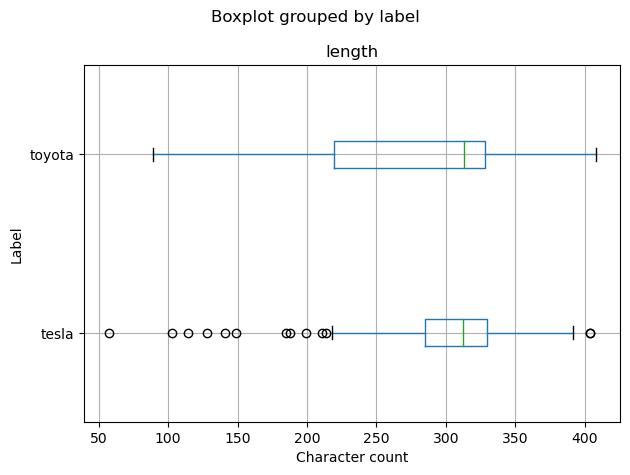

In [64]:
# crete boxplot to see distribution of counts by label
plt.figure(figsize=(8, 6))
combined.boxplot(column='length', by='label', vert=False)
plt.xlabel('Character count')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

### clean and process text

In [65]:
# define function to tokenize text
def tokenize(text):
  return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [66]:
# check stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
list(stopwords)[:5]

["should've", 'mightn', "needn't", 'doing', 'through']

In [67]:
# add tesla and toyota as stopwords, we do not want to see these words in the features
include_stopwords = {'tesla', 'toyota'}
stopwords |= include_stopwords

In [68]:
# define function to remove stopwords
def remove_stop(tokens):
  return [t for t in tokens if t.lower() not in stopwords]

In [69]:
# create pipeline to lowercase, tokenize and remove stop words
pipeline = [str.lower, tokenize, remove_stop]

# define function to feed text data through the pipeline and return cleaned tokens
def prepare(text, pipeline):

  # convert text to string if it's not already a string (for float types)
  text = str(text)

  tokens = text
  for transform in pipeline:
    tokens = transform(tokens)
  return tokens

In [70]:
combined['tokens'] = combined['text'].apply(prepare, pipeline=pipeline)
combined.head()

,source,author,title,description,url,urlToImage,publishedAt,content,label,text,length,tokens
0,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,Tesla “Full Self Driving” Could Come To Other ...,Ever since Tesla started rolling out Full Self...,https://cleantechnica.com/2024/04/23/tesla-ful...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T03:55:41Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla “Full Self Driving” Could Come To Other ...,328.0,"[full, self, driving, could, come, countries, ..."
1,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,More Than 3× As Many Tesla Model Y Sales As Te...,"Tesla’s just had a tough quarter, including in...",https://cleantechnica.com/2024/04/19/more-than...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-20T03:57:24Z,Sign up for daily news updates from CleanTechn...,tesla,More Than 3× As Many Tesla Model Y Sales As Te...,346.0,"[many, model, sales, model, sales, usa, 1st, q..."
2,"{'id': None, 'name': 'CleanTechnica'}",Paul Fosse,Tesla Surprises Investors With A Tiny Y & A Ti...,A lot has been written about the Tesla’s next-...,https://cleantechnica.com/2024/04/23/tesla-sur...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T01:56:23Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla Surprises Investors With A Tiny Y & A Ti...,333.0,"[surprises, investors, tiny, tiny, soon, year,..."
3,"{'id': None, 'name': 'CleanTechnica'}",Carolyn Fortuna,The Revisionist Language That Tesla Used In Th...,"The Tesla, Inc. Q1 2024 earnings call was fasc...",https://cleantechnica.com/2024/04/26/the-revis...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-26T19:24:10Z,Sign up for daily news updates from CleanTechn...,tesla,The Revisionist Language That Tesla Used In Th...,330.0,"[revisionist, language, used, q1, earnings, ca..."
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Paul Sawers,French startup FlexAI exits stealth with $30M ...,A French startup has raised a hefty seed inves...,https://techcrunch.com/2024/04/23/french-start...,https://s.yimg.com/ny/api/res/1.2/V7FcJP2rJb.Y...,2024-04-24T05:37:28Z,A French startup has raised a hefty seed inves...,tesla,French startup FlexAI exits stealth with $30M ...,232.0,"[french, startup, flexai, exits, stealth, 30m,..."


In [71]:
combined[:1]

,source,author,title,description,url,urlToImage,publishedAt,content,label,text,length,tokens
0,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,Tesla “Full Self Driving” Could Come To Other ...,Ever since Tesla started rolling out Full Self...,https://cleantechnica.com/2024/04/23/tesla-ful...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T03:55:41Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla “Full Self Driving” Could Come To Other ...,328.0,"[full, self, driving, could, come, countries, ..."


In [72]:
# get the number of tokens as a field
combined['num_tokens'] = combined['tokens'].map(len)
combined[:1]

,source,author,title,description,url,urlToImage,publishedAt,content,label,text,length,tokens,num_tokens
0,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,Tesla “Full Self Driving” Could Come To Other ...,Ever since Tesla started rolling out Full Self...,https://cleantechnica.com/2024/04/23/tesla-ful...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T03:55:41Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla “Full Self Driving” Could Come To Other ...,328.0,"[full, self, driving, could, come, countries, ...",32


### EDA and visualizations

In [82]:
# seperate records based on labels in 2 different series
tesla_tokens = combined.loc[combined['label'] == 'tesla', 'tokens']
toyota_tokens = combined.loc[combined['label'] == 'toyota', 'tokens']

tesla_tokens[:5]

0    [full, self, driving, could, come, countries, ...
1    [many, model, sales, model, sales, usa, 1st, q...
2    [surprises, investors, tiny, tiny, soon, year,...
3    [revisionist, language, used, q1, earnings, ca...
4    [french, startup, flexai, exits, stealth, 30m,...
Name: tokens, dtype: object

In [81]:
# flatten each so we can get all tokens in each df into a single list
tesla_flat_tokens = [word for sublist in tesla_tokens for word in sublist]
toyota_flat_tokens = [word for sublist in toyota_tokens for word in sublist]

tesla_flat_tokens[:5]

['full', 'self', 'driving', 'could', 'come']

In [83]:
# 2828 tokens
len(tesla_flat_tokens)

2828

In [87]:
# get count of each word 
tesla_word_counts = Counter(tesla_flat_tokens)
toyota_word_counts = Counter(toyota_flat_tokens)

# check the first 5 records
dict(list(tesla_word_counts.items())[:5])

{'full': 10, 'self': 3, 'driving': 3, 'could': 7, 'come': 3}

In [92]:
# get the 10 most common words for both each
print(tesla_word_counts.most_common(10))

[('musk', 34), ('elon', 29), ('ev', 24), ('model', 22), ('earnings', 21), ('company', 20), ('china', 19), ('electric', 18), ('cybertruck', 18), ('fsd', 16)]


In [93]:
print(toyota_word_counts.most_common(10))

[('motor', 45), ('electric', 28), ('ev', 25), ('new', 22), ('sales', 21), ('com', 21), ('billion', 21), ('year', 19), ('america', 18), ('marketscreener', 18)]


In [107]:
# convert counter type to list so we can plot
top_tesla_words = list(tesla_word_counts.most_common(10))
top_toyota_words = list(toyota_word_counts.most_common(10))

In [109]:
# get words and their count from the list
tesla_words, tesla_counts = zip(*top_tesla_words)
toyota_words, toyota_counts = zip(*top_toyota_words)

print(tesla_words)
print(tesla_counts)

('musk', 'elon', 'ev', 'model', 'earnings', 'company', 'china', 'electric', 'cybertruck', 'fsd')
(34, 29, 24, 22, 21, 20, 19, 18, 18, 16)


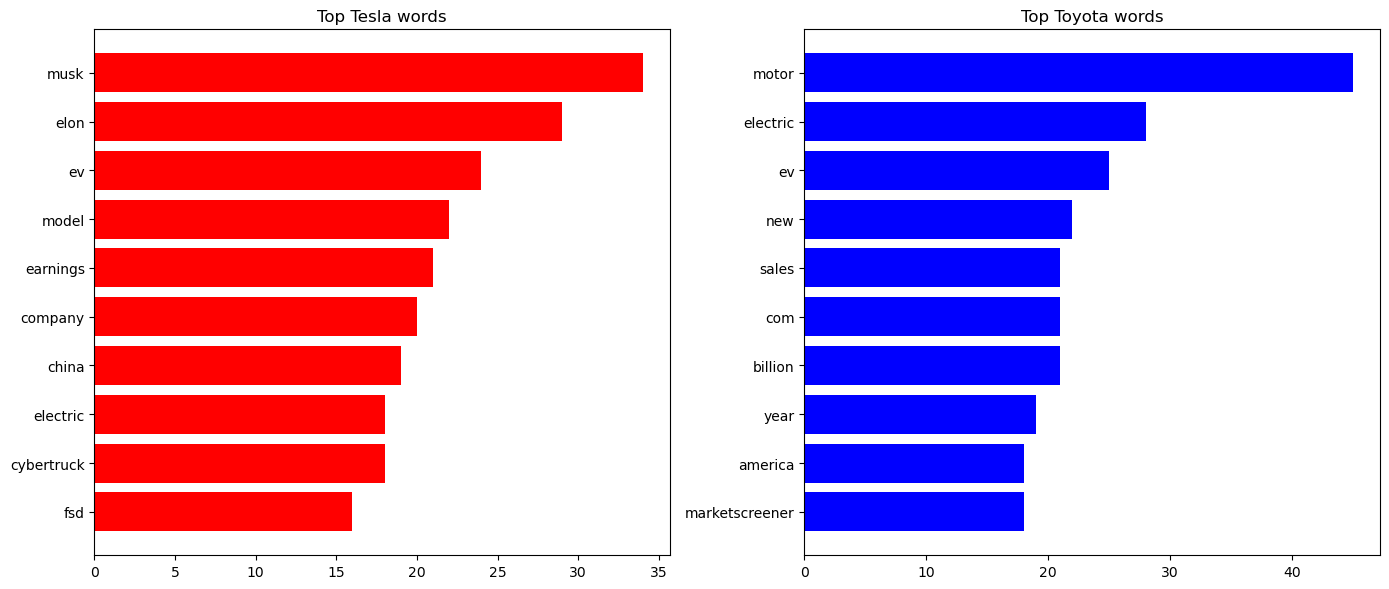

In [111]:
# create 2 subplots, next to eachother
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# plot tesla words, highest counts at the top
ax[0].barh(tesla_words, tesla_counts, color='red')
ax[0].invert_yaxis()
ax[0].set_title('Top Tesla words')

# do the same for toyota
ax[1].barh(toyota_words, toyota_counts, color='blue')
ax[1].invert_yaxis()  # Highest counts at the top
ax[1].set_title('Top Toyota words')

# show the plot, tight layout so fit is better
plt.tight_layout()
plt.show()

In [113]:
# now to get the descriptive statistics, define the function created in earlier assignments
def descriptive_stats(tokens, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # length of num tokens list
    num_tokens = len(tokens)

    # length of unique tokens in list
    num_unique_tokens = len(set(tokens))

    # unique tokens divided by total tokens to see diversity
    lexical_diversity = num_unique_tokens / num_tokens

    # get sum of characters
    sum = 0
    for word in tokens:
        for char in word:
            sum += 1

    num_characters = sum
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [116]:
# Split the DataFrame based on the "label" field
tesla_df = combined[combined['label'] == 'tesla']
toyota_df = combined[combined['label'] == 'toyota']

# Combine all the lists in the "tokens" field into one giant list for each DataFrame
tesla_tokens = [item for sublist in tesla_df['tokens'] for item in sublist]
toyota_tokens = [item for sublist in toyota_df['tokens'] for item in sublist]

In [118]:
tesla_tokens[:5]

['full', 'self', 'driving', 'could', 'come']

In [119]:
# apply descriptive stats to the tesla tokens
descriptive_stats(tesla_tokens)

There are 2828 tokens in the data.
There are 1424 unique tokens in the data.
There are 17430 characters in the data.
The lexical diversity is 0.504 in the data.


[2828, 1424, 0.5035360678925035, 17430]

In [120]:
# do the same for toyota
descriptive_stats(toyota_tokens)

There are 2763 tokens in the data.
There are 1248 unique tokens in the data.
There are 17610 characters in the data.
The lexical diversity is 0.452 in the data.


[2763, 1248, 0.4516829533116178, 17610]

## Part 2: Classification Models

In [121]:
combined.head()

,source,author,title,description,url,urlToImage,publishedAt,content,label,text,length,tokens,num_tokens
0,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,Tesla “Full Self Driving” Could Come To Other ...,Ever since Tesla started rolling out Full Self...,https://cleantechnica.com/2024/04/23/tesla-ful...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T03:55:41Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla “Full Self Driving” Could Come To Other ...,328.0,"[full, self, driving, could, come, countries, ...",32
1,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,More Than 3× As Many Tesla Model Y Sales As Te...,"Tesla’s just had a tough quarter, including in...",https://cleantechnica.com/2024/04/19/more-than...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-20T03:57:24Z,Sign up for daily news updates from CleanTechn...,tesla,More Than 3× As Many Tesla Model Y Sales As Te...,346.0,"[many, model, sales, model, sales, usa, 1st, q...",31
2,"{'id': None, 'name': 'CleanTechnica'}",Paul Fosse,Tesla Surprises Investors With A Tiny Y & A Ti...,A lot has been written about the Tesla’s next-...,https://cleantechnica.com/2024/04/23/tesla-sur...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-24T01:56:23Z,Sign up for daily news updates from CleanTechn...,tesla,Tesla Surprises Investors With A Tiny Y & A Ti...,333.0,"[surprises, investors, tiny, tiny, soon, year,...",29
3,"{'id': None, 'name': 'CleanTechnica'}",Carolyn Fortuna,The Revisionist Language That Tesla Used In Th...,"The Tesla, Inc. Q1 2024 earnings call was fasc...",https://cleantechnica.com/2024/04/26/the-revis...,https://cleantechnica.com/wp-content/uploads/2...,2024-04-26T19:24:10Z,Sign up for daily news updates from CleanTechn...,tesla,The Revisionist Language That Tesla Used In Th...,330.0,"[revisionist, language, used, q1, earnings, ca...",30
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Paul Sawers,French startup FlexAI exits stealth with $30M ...,A French startup has raised a hefty seed inves...,https://techcrunch.com/2024/04/23/french-start...,https://s.yimg.com/ny/api/res/1.2/V7FcJP2rJb.Y...,2024-04-24T05:37:28Z,A French startup has raised a hefty seed inves...,tesla,French startup FlexAI exits stealth with $30M ...,232.0,"[french, startup, flexai, exits, stealth, 30m,...",25
